## Plot the displacement at collision points

To see if the acceleration (or deceleration) is a good enough proxy for collision where the object shape is unreliable.

In [2]:
from scripts.tools.ground_truth_toml_reader import GroundTruth
from scripts.tools.animal_dataframe import AnimalDataFrame
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scripts.tools.estimate_ground_plane import GroundPlaneEstimation
from src.loader import InstanceLoader
from src.collision import CollisionDetector

data_folder = Path("/Users/persie/PhD_Code/3d_ant_data_rle/")
session_list = [6,10,11,13,17,19,20,21,22,23,28,29,30]
obj_ref_frame = [500,180,380,849,459, 59, 842, 24, 93, 176, 2626, 595, 241 ]
prefix = "240905-1616"
skeleton_toml_path = "../skeleton.toml"

node_of_interest = ['a_R2']

At the exact frame of contact, the acceleration has a mean of 0, but what if we look at the frame before or after.

In [3]:

experiment = 11
session = session_list[experiment]
obj_ref = obj_ref_frame[experiment]



In [4]:
gt = GroundTruth(data_folder, prefix, session)
track_list = gt["tracks"]

# Load the experiment
t = InstanceLoader(data_folder=data_folder,
                   session_number=session,
                   skeleton_toml_path=skeleton_toml_path,
                   obj_ref_frame=obj_ref,
                   prefix=prefix,
                   track_number=track_list)


# Estimate the ground plane for this experiment
g = GroundPlaneEstimation(t.animal_list,
                          node_list=['leg_m_L2', 'leg_m_R2', 'leg_f_L2', 'leg_f_R2'], use_precalc=True)

c = CollisionDetector(animal_list=t.animal_list,
                      obj_list=t.obj_list,
                      node_of_interest=node_of_interest)

In [10]:

collision_tracks = c.get_tracks_in_collision()
#Find all the tracks that are in the collisions
total_below_uq = 0
total_contact = 0
for track in collision_tracks:

    local_collision_df = c.get_track(track)
    local_collision_frames = local_collision_df.index.unique().values

    animal = t.animal_list.animal(track)
    adf = AnimalDataFrame(animal, None, node_of_interest, signed=True)
    # acceleration_df = adf.position_xyz(clean=True).xs('z', level="Axis")
    displace_df = adf.displace_mag(clean=False).dropna(axis=1)

    below_uq = displace_df < 0.1
    print(below_uq)
    total_below_uq += below_uq.sum(axis=1).item()
    total_contact += below_uq.size





       954    983    984    985    986   987   992    995    996    997   ...  \
a_R2  False  False  False  False  False  True  True  False  False  False  ...   

       2959   2960  2964   2965   2966   2967   2968   2975  2976  2983  
a_R2  False  False  True  False  False  False  False  False  True  True  

[1 rows x 613 columns]


In [66]:
ratio_under_uq = total_below_uq / total_contact



In [11]:
# sub_df = displace_df[[1746, 1747, 1748, 1749,1750,1763,1793,1794,1795,1798, 1799, 1800, 1805, 1806, 1807]]
sub_df = displace_df[[1798, 1799, 1800, 1805, 1806, 1807, 1808, 1809]]


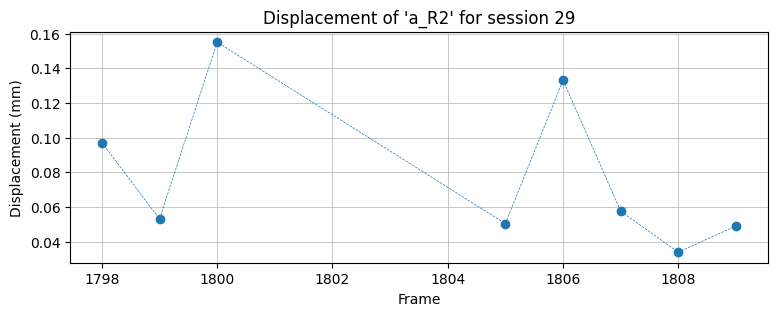

In [12]:
fig, ax = plt.subplots(figsize=(9 , 3))
ax.plot('a_R2',data=sub_df.T, linestyle='--', marker='o', linewidth=0.5)


plt.title("Displacement of 'a_R2' for session 29")
plt.xlabel("Frame")
plt.ylabel("Displacement (mm)")
plt.grid(visible=True, which='major', linestyle='-', linewidth=0.5)
plt.grid(visible=True, which='minor', linestyle='-', linewidth=0.1)
plt.savefig("/Users/persie/Library/CloudStorage/OneDrive-UniversityofEdinburgh/PhD/Figures/Thesis Figures/Experiment Analysis/antenna_displacement.svg")
plt.show()